In [3]:
import os
import shutil
import random
from PIL import Image
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

from bertopic import BERTopic

from bertopic.representation import KeyBERTInspired
from bertopic.representation import PartOfSpeech
from bertopic.representation import MaximalMarginalRelevance

import sys
sys.path.insert(0, "/Users/connorparish/code/hindsight")
sys.path.insert(0, "../../")

from annotation_helpers import add_hindsight_frame_path, get_entity_image, visualize_annotations, get_entity_image
from annotations_db import HindsightAnnotationsDB

from hindsight_server.db import HindsightDB
from hindsight_server.utils import make_dir, ocr_results_to_str, add_datetimes

In [4]:
# tweets_df = pd.read_csv("extracted_tweets_1.csv")
tweets_df = pd.read_csv("../entity_extraction/all_tweets-1728074778.csv")
tweets_df = add_datetimes(tweets_df)

In [5]:
looked_at_tweets = pd.read_csv("../usage_summaries/looked_at_tweets.csv")

In [6]:
tweets_df = tweets_df.loc[tweets_df['frame_id'].isin(looked_at_tweets['id'])]

In [8]:
tweets_df['datetime_to_day'] = tweets_df['datetime_local'].dt.floor('D')

<Axes: xlabel='datetime_to_day'>

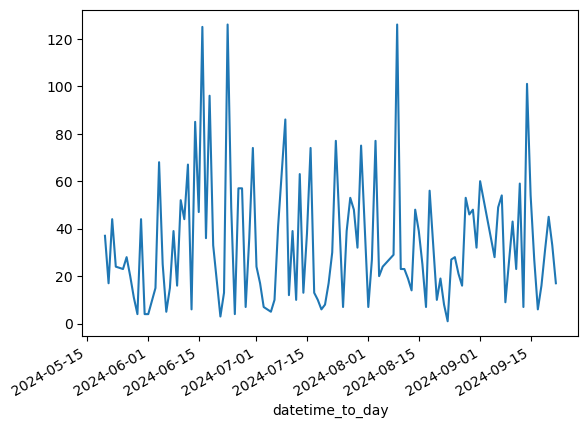

In [9]:
tweets_df.groupby(['datetime_to_day']).username.count().plot()

In [10]:
main_representation = KeyBERTInspired()

# Additional ways of representing a topic
aspect_model1 = PartOfSpeech("en_core_web_sm")
aspect_model2 = [KeyBERTInspired(top_n_words=30), MaximalMarginalRelevance(diversity=.5)]

# Add all models together to be run in a single `fit`
representation_model = {
   "Main": main_representation,
   "Aspect1":  aspect_model1,
   "Aspect2":  aspect_model2 
}
topic_model = BERTopic(representation_model=representation_model)

In [11]:
tweets_df = tweets_df.dropna(subset=['tweet_text'])
tweets_df = tweets_df.drop_duplicates(subset=['tweet_text'], keep="first")

In [12]:
topics, probs = topic_model.fit_transform(tweets_df['tweet_text'])

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [13]:
topic_info = topic_model.get_topic_info()

In [14]:
doc_info = topic_model.get_document_info(tweets_df['tweet_text'])

In [15]:
doc_info = doc_info.merge(tweets_df, left_on="Document", right_on=tweets_df['tweet_text'])

In [16]:
now_utc = datetime.utcnow()

time_start = (now_utc - timedelta(days=30)).replace(hour=0, minute=0, second=0, microsecond=0)

In [17]:
doc_info_filtered = doc_info.loc[doc_info['datetime_local'].dt.date >= time_start.date()]

In [18]:
grouped = doc_info_filtered.groupby('Name').resample('D', on='datetime_local').size().unstack(fill_value=0)

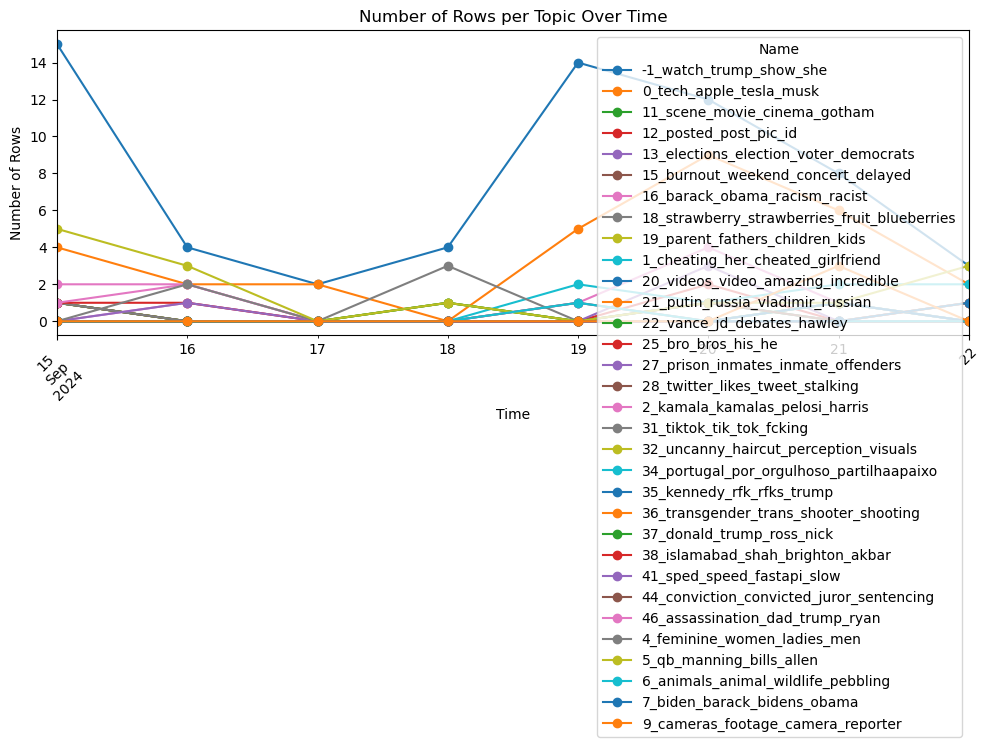

In [19]:
ax = grouped.T.plot(kind='line', figsize=(10, 6), marker='o')
ax.set_title('Number of Rows per Topic Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Rows')
# ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
doc_info.to_csv("topic_modeled_tweets.csv", index=False)

In [20]:
doc_info.loc[doc_info['Topic'] == 1]['Document'].iloc[0]

'She needs to leave his ass FAST'

In [21]:
for d in doc_info.loc[doc_info['Topic'] == 1]['Document']:
    print(d)

She needs to leave his ass FAST
how tf did this man have angelina jolie acting like this (1)
how tf did this man have angelina jolie acting like this t
Taylor Swift emits 8,205 tons of CO2 in a year. An average American emits 16. This is who lectures us on the climate.
taylor was in that ugly ass blazer getting down
no way katy perry and doechii just scissored each other on stage
"I have a husband"
"I have a husband" 
You can't date her unless you are okay with waking up next to a little boyfriend, a little fem girlfriend, or an androgynous partner... depending on the day. We have a mental illness epidemic in this country.
Groom sees his best friend in wedding dress
She doesn't like nice guys
Mila Kunis has been cast in 'KNIVES OUT 3' (Source: Deadline)
When did you realize that your partner was not, in fact, "the one"?
She washed her feet before she cooked I am proud of her because she's not allowing her disability to hender her!
i wonder where she is now
Laughing at making an old wom